# IMPORT LIBRARIES & DATA


In [6]:
%pip install matplotlib numpy pandas

import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
distance_df = pd.read_csv('../data/HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48


In [8]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)

# GA + Local search


=== Số người (m) = 1 ===


Chạy GA (m = 1):   0%|                                  | 0/300 [00:00<?, ?it/s]

[Gen   0] Best fitness: 1595.61


Chạy GA (m = 1):   7%|█▊                       | 21/300 [00:06<00:39,  7.00it/s]

[Gen  20] Best fitness: 1270.00


Chạy GA (m = 1):  14%|███▌                     | 42/300 [00:08<00:30,  8.41it/s]

[Gen  40] Best fitness: 1154.99


Chạy GA (m = 1):  21%|█████▏                   | 62/300 [00:10<00:29,  8.03it/s]

[Gen  60] Best fitness: 1115.25


Chạy GA (m = 1):  27%|██████▊                  | 82/300 [00:12<00:23,  9.20it/s]

[Gen  80] Best fitness: 1104.94


Chạy GA (m = 1):  34%|████████▏               | 102/300 [00:14<00:19, 10.06it/s]

[Gen 100] Best fitness: 1057.33


Chạy GA (m = 1):  41%|█████████▊              | 122/300 [00:16<00:20,  8.83it/s]

[Gen 120] Best fitness: 1057.33


Chạy GA (m = 1):  47%|███████████▎            | 141/300 [00:18<00:16,  9.91it/s]

[Gen 140] Best fitness: 1033.91


Chạy GA (m = 1):  54%|████████████▉           | 162/300 [00:21<00:14,  9.53it/s]

[Gen 160] Best fitness: 1006.14


Chạy GA (m = 1):  61%|██████████████▋         | 183/300 [00:23<00:11, 10.12it/s]

[Gen 180] Best fitness: 983.88


Chạy GA (m = 1):  67%|████████████████        | 201/300 [00:24<00:09, 10.50it/s]

[Gen 200] Best fitness: 971.76


Chạy GA (m = 1):  74%|█████████████████▊      | 222/300 [00:27<00:08,  9.39it/s]

[Gen 220] Best fitness: 933.28


Chạy GA (m = 1):  80%|███████████████████▏    | 240/300 [00:29<00:07,  8.09it/s]

[Gen 240] Best fitness: 921.97


Chạy GA (m = 1):  87%|████████████████████▉   | 262/300 [00:32<00:03,  9.72it/s]

[Gen 260] Best fitness: 889.85


Chạy GA (m = 1):  94%|██████████████████████▍ | 281/300 [00:34<00:01, 10.79it/s]

[Gen 280] Best fitness: 889.85


Chạy GA (m = 1): 100%|████████████████████████| 300/300 [00:36<00:00,  8.33it/s]


[Gen 299] Best fitness: 889.85
Tổng quãng đường: 889.85
Tuyến dài nhất (fitness): 889.85
Chênh lệch giữa các tuyến (Balance metric): 0.00
Thời gian thực thi: 36.1424 giây
Số vòng lặp để hội tụ: 28
Tốc độ hội tụ: 25.2057 đơn vị/gen
 - Tuyến 1 (889.85): [0, 124, 126, 40, 95, 84, 82, 107, 123, 38, 37, 117, 115, 85, 83, 74, 72, 52, 55, 78, 69, 97, 76, 88, 18, 86, 96, 29, 105, 112, 108, 35, 101, 15, 3, 5, 67, 99, 110, 113, 64, 77, 61, 54, 49, 45, 43, 1, 59, 46, 12, 27, 62, 87, 31, 118, 32, 106, 91, 90, 65, 44, 66, 71, 63, 25, 24, 36, 104, 7, 2, 125, 22, 60, 56, 11, 13, 94, 47, 98, 89, 9, 70, 4, 17, 80, 122, 121, 109, 100, 30, 28, 33, 103, 39, 114, 26, 57, 10, 93, 20, 23, 111, 102, 92, 6, 81, 50, 53, 75, 8, 68, 48, 14, 79, 116, 51, 58, 42, 41, 16, 19, 73, 21, 34, 120, 119, 0]


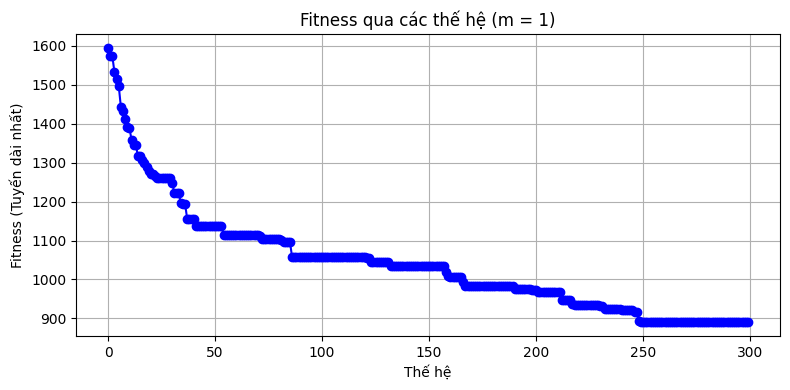


=== Số người (m) = 2 ===


Chạy GA (m = 2):   0%|                          | 1/300 [00:00<00:32,  9.27it/s]

[Gen   0] Best fitness: 826.17


Chạy GA (m = 2):   8%|█▉                       | 23/300 [00:02<00:31,  8.89it/s]

[Gen  20] Best fitness: 732.93


Chạy GA (m = 2):  14%|███▌                     | 42/300 [00:04<00:31,  8.09it/s]

[Gen  40] Best fitness: 671.79


Chạy GA (m = 2):  21%|█████▎                   | 63/300 [00:07<00:21, 11.16it/s]

[Gen  60] Best fitness: 641.77


Chạy GA (m = 2):  27%|██████▊                  | 81/300 [00:08<00:20, 10.88it/s]

[Gen  80] Best fitness: 630.53


Chạy GA (m = 2):  34%|████████▏               | 103/300 [00:10<00:18, 10.80it/s]

[Gen 100] Best fitness: 594.04


Chạy GA (m = 2):  40%|█████████▋              | 121/300 [00:12<00:16, 10.86it/s]

[Gen 120] Best fitness: 594.04


Chạy GA (m = 2):  47%|███████████▎            | 142/300 [00:14<00:14, 10.55it/s]

[Gen 140] Best fitness: 587.98


Chạy GA (m = 2):  54%|████████████▉           | 161/300 [00:16<00:18,  7.44it/s]

[Gen 160] Best fitness: 587.98


Chạy GA (m = 2):  60%|██████████████▍         | 181/300 [00:18<00:11, 10.37it/s]

[Gen 180] Best fitness: 587.98


Chạy GA (m = 2):  67%|████████████████▏       | 202/300 [00:21<00:09, 10.45it/s]

[Gen 200] Best fitness: 587.98


Chạy GA (m = 2):  74%|█████████████████▊      | 222/300 [00:22<00:07, 10.83it/s]

[Gen 220] Best fitness: 587.98


Chạy GA (m = 2):  81%|███████████████████▎    | 242/300 [00:24<00:05, 10.57it/s]

[Gen 240] Best fitness: 587.98


Chạy GA (m = 2):  87%|████████████████████▉   | 262/300 [00:26<00:03, 10.78it/s]

[Gen 260] Best fitness: 587.98


Chạy GA (m = 2):  94%|██████████████████████▌ | 282/300 [00:28<00:01, 11.08it/s]

[Gen 280] Best fitness: 587.98


Chạy GA (m = 2): 100%|████████████████████████| 300/300 [00:30<00:00,  9.86it/s]

[Gen 299] Best fitness: 587.98


Tổng quãng đường: 1171.20
Tuyến dài nhất (fitness): 587.98
Chênh lệch giữa các tuyến (Balance metric): 3.50
Thời gian thực thi: 30.6853 giây
Số vòng lặp để hội tụ: 16
Tốc độ hội tụ: 14.8869 đơn vị/gen
 - Tuyến 1 (587.35): [0, 95, 126, 119, 117, 56, 39, 122, 63, 14, 111, 105, 34, 59, 43, 62, 44, 26, 47, 35, 61, 92, 113, 25, 94, 22, 32, 28, 112, 16, 19, 73, 120, 23, 79, 29, 98, 90, 114, 66, 24, 78, 12, 84, 74, 67, 53, 49, 55, 65, 86, 77, 101, 15, 21, 76, 89, 68, 1, 116, 36, 118, 104, 0]
 - Tuyến 2 (583.85): [0, 82, 85, 45, 48, 93, 18, 123, 38, 51, 10, 52, 88, 100, 107, 109, 37, 13, 60, 121, 115, 57, 50, 108, 96, 27, 110, 97, 3, 75, 64, 99, 70, 17, 102, 20, 7, 4, 71, 58, 11, 41, 42, 72, 31, 91, 5, 54, 80, 9, 30, 106, 83, 125, 33, 103, 2, 8, 46, 6, 81, 87, 69, 124, 40, 0]


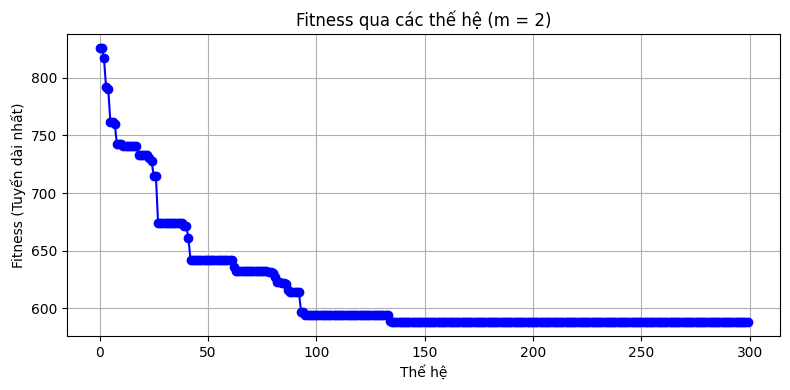


=== Số người (m) = 3 ===


Chạy GA (m = 3):   0%|                                  | 0/300 [00:00<?, ?it/s]

[Gen   0] Best fitness: 609.23

Chạy GA (m = 3):   0%|                          | 1/300 [00:00<00:43,  6.94it/s]

Chạy GA (m = 3):   7%|█▊                       | 22/300 [00:02<00:25, 11.09it/s]

[Gen  20] Best fitness: 509.09


Chạy GA (m = 3):  14%|███▌                     | 42/300 [00:04<00:24, 10.33it/s]

[Gen  40] Best fitness: 505.41


Chạy GA (m = 3):  21%|█████▏                   | 62/300 [00:05<00:21, 10.85it/s]

[Gen  60] Best fitness: 483.80


Chạy GA (m = 3):  27%|██████▊                  | 82/300 [00:08<00:24,  8.96it/s]

[Gen  80] Best fitness: 483.80


Chạy GA (m = 3):  34%|████████▏               | 102/300 [00:10<00:20,  9.79it/s]

[Gen 100] Best fitness: 483.80


Chạy GA (m = 3):  41%|█████████▊              | 122/300 [00:12<00:18,  9.38it/s]

[Gen 120] Best fitness: 476.23


Chạy GA (m = 3):  47%|███████████▎            | 142/300 [00:14<00:14, 11.09it/s]

[Gen 140] Best fitness: 473.92


Chạy GA (m = 3):  54%|████████████▉           | 162/300 [00:16<00:14,  9.22it/s]

[Gen 160] Best fitness: 469.96


Chạy GA (m = 3):  61%|██████████████▌         | 182/300 [00:18<00:12,  9.17it/s]

[Gen 180] Best fitness: 469.96


Chạy GA (m = 3):  67%|████████████████▏       | 202/300 [00:20<00:11,  8.41it/s]

[Gen 200] Best fitness: 457.29


Chạy GA (m = 3):  74%|█████████████████▊      | 222/300 [00:23<00:10,  7.40it/s]

[Gen 220] Best fitness: 452.70


Chạy GA (m = 3):  81%|███████████████████▎    | 242/300 [00:25<00:06,  9.33it/s]

[Gen 240] Best fitness: 435.40


Chạy GA (m = 3):  87%|████████████████████▉   | 262/300 [00:27<00:04,  9.21it/s]

[Gen 260] Best fitness: 430.68


Chạy GA (m = 3):  94%|██████████████████████▍ | 281/300 [00:29<00:01,  9.53it/s]

[Gen 280] Best fitness: 428.70


Chạy GA (m = 3): 100%|████████████████████████| 300/300 [00:32<00:00,  9.36it/s]


[Gen 299] Best fitness: 427.56
Tổng quãng đường: 1278.89
Tuyến dài nhất (fitness): 427.56
Chênh lệch giữa các tuyến (Balance metric): 3.62
Thời gian thực thi: 32.5066 giây
Số vòng lặp để hội tụ: 17
Tốc độ hội tụ: 10.6865 đơn vị/gen
 - Tuyến 1 (427.39): [0, 126, 124, 40, 119, 38, 15, 87, 78, 104, 31, 35, 19, 91, 92, 64, 66, 32, 88, 26, 36, 80, 89, 82, 61, 77, 53, 57, 5, 75, 22, 100, 116, 23, 101, 99, 39, 122, 121, 21, 111, 97, 69, 0]
 - Tuyến 2 (427.56): [0, 67, 60, 108, 14, 105, 34, 9, 4, 1, 42, 11, 13, 8, 28, 115, 83, 63, 45, 51, 58, 10, 79, 73, 113, 47, 16, 120, 86, 30, 114, 52, 65, 96, 49, 7, 18, 71, 112, 81, 76, 117, 33, 0]
 - Tuyến 3 (423.94): [0, 107, 25, 29, 123, 37, 3, 48, 43, 44, 55, 103, 20, 17, 68, 98, 74, 70, 46, 2, 102, 106, 110, 27, 50, 59, 56, 41, 109, 12, 93, 24, 118, 125, 6, 90, 54, 94, 85, 72, 62, 84, 95, 0]


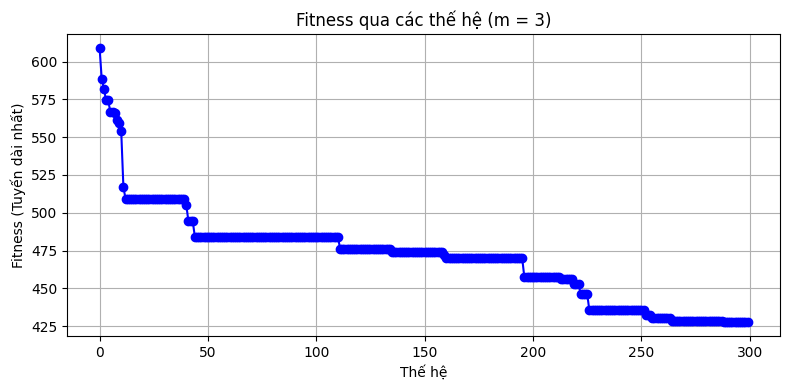

In [9]:

for m in range(1, 4):
    print(f"\n=== Số người (m) = {m} ===")
    
    start_time = time.time()
    total_distance, routes, fitness, fitness_per_generation = solve(distance_matrix, m)
    end_time = time.time()

    exec_time = end_time - start_time

    # Tính độ dài từng tuyến để đánh giá
    route_distances = [
        sum(distance_matrix[r[i]][r[i+1]] for i in range(len(r)-1))
        for r in routes
    ]
    max_len = max(route_distances)
    min_len = min(route_distances)
    balance_metric = max_len - min_len

    # Phân tích hội tụ
    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen else 0

    # In kết quả
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất (fitness): {fitness:.2f}")
    print(f"Chênh lệch giữa các tuyến (Balance metric): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")

    for i, r in enumerate(routes):
        print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {r}")

    # Vẽ biểu đồ fitness
    plt.figure(figsize=(8, 4))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='blue')
    plt.title(f"Fitness qua các thế hệ (m = {m})")
    plt.xlabel("Thế hệ")
    plt.ylabel("Fitness (Tuyến dài nhất)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# GASA


# RLGA

# NSGA II